In [1]:
!pip install geodatasets
!pip install rioxarray
!pip install geocube

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 774.9 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 2.4.0
    Uninstalling platformdirs-2.4.0:
      Successfully uninstalled platformdirs-2.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylint 2.12.2 requires mccabe<0.7,>=0.6, but you have mccabe 0.7.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 962.9 kB/s eta 0:00:0000:0100:01
  Using cached cachetools-5.3.2-py3-none-any.whl.metadata (5.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 682.9 kB/s eta 0:00:00a 0:00:01
Using cached cachetools-5.3.2-py3-none-any.whl (9.3 kB)


In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

In [3]:
df = pd.read_excel('GIS_data_code.xlsx', sheet_name=1, header=0)
df = df.rename(columns={'Longitude (degrees)' : 'Longitude',
                   'Latitude (degrees)' : 'Latitude'})
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude),
    crs='EPSG:4326' #GPS가 사용하는 좌표계
)

In [4]:
gdf.head()

,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,Population density in a 10km radius -Mean,Population density in a 20km radius -Mean,Population density in a 100km radius -Mean,...,Arid climate,Tropical rainforest climate,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 10 km radius - Mean.1,Pasture land in a 10 km radius - Mean.2,geometry
0,101,64665,Santa Catarina,Brazil,Latin America and Caribbean,-28.73240,-49.24552,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.24552 -28.73240)
1,11 RAU-Novaya,68289,Luhans'ka Oblast',Ukraine,Europe,48.51954,38.65827,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (38.65827 48.51954)
2,1165L,63154,Tete,Mozambique,Africa,-16.23000,34.00000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (34.00000 -16.23000)
3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.48279,-58.83353,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.83353 -11.48279)
4,12 Mile Creek,66178,Queensland,Australia,Asia-Pacific,-23.16300,149.08300,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (149.08300 -23.16300)


<Axes: >

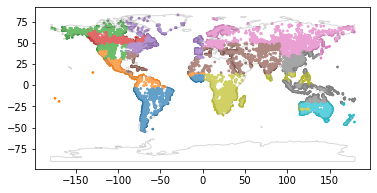

In [5]:
world = geopandas.read_file(get_path('naturalearth.land'))

ax = gdf.plot(column='geometry', s=3)
world.plot(ax=ax, color='white', alpha=0.3, edgecolor='gray')

In [6]:
clm_types = [
       1,1,'Af','Tropical, rainforest',[0, 0, 255],
       2,1,'Am','Tropical, monsoon',[0, 120, 255],
       3,1,'Aw','Tropical, savannah',[70, 170, 250],
       4,2,'BWh','Arid, desert, hot',[255, 0, 0],
       5,2,'BWk','Arid, desert, cold',[255, 150, 150],
       6,2,'BSh','Arid, steppe, hot',[245, 165, 0],
       7,2,'BSk','Arid, steppe, cold',[255, 220, 100],
       8,3,'Csa','Temperate, dry summer, hot summer',[255, 255, 0],
       9,3,'Csb','Temperate, dry summer, warm summer',[200, 200, 0],
       10,3,'Csc','Temperate, dry summer, cold summer',[150, 150, 0],
       11,3,'Cwa','Temperate, dry winter, hot summer',[150, 255, 150],
       12,3,'Cwb','Temperate, dry winter, warm summer',[100, 200, 100],
       13,3,'Cwc','Temperate, dry winter, cold summer',[50, 150, 50],
       14,3,'Cfa','Temperate, no dry season, hot summer',[200, 255, 80],
       15,3,'Cfb','Temperate, no dry season, warm summer',[100, 255, 80],
       16,3,'Cfc','Temperate, no dry season, cold summer',[50, 200, 0],
       17,4,'Dsa','Cold, dry summer, hot summer',[255, 0, 255],
       18,4,'Dsb','Cold, dry summer, warm summer',[200, 0, 200],
       19,4,'Dsc','Cold, dry summer, cold summer',[150, 50, 150],
       20,4,'Dsd','Cold, dry summer, very cold winter',[150, 100, 150],
       21,4,'Dwa','Cold, dry winter, hot summer',[170, 175, 255],
       22,4,'Dwb','Cold, dry winter, warm summer',[90, 120, 220],
       23,4,'Dwc','Cold, dry winter, cold summer',[75, 80, 180],
       24,4,'Dwd','Cold, dry winter, very cold winter',[50, 0, 135],
       25,4,'Dfa','Cold, no dry season, hot summer',[0, 255, 255],
       26,4,'Dfb','Cold, no dry season, warm summer',[55, 200, 255],
       27,4,'Dfc','Cold, no dry season, cold summer',[0, 125, 125],
       28,4,'Dfd','Cold, no dry season, very cold winter',[0, 70, 95],
       29,5,'ET','Polar, tundra',[178, 178, 178],
       30,5,'EF','Polar, frost',[102, 102, 102],
]

chunk_size = 5
result = []
for i in range(0, len(clm_types), chunk_size):
    result.append(clm_types[i:i+chunk_size])

legend = pd.DataFrame(result)
legend.columns = ['index', 'category', 'abb', 'name', 'rgb']


In [ ]:
#legend.to_csv('/content/drive/MyDrive/23GIS_project/koppen_geiger_tif/legend.csv', index=False)

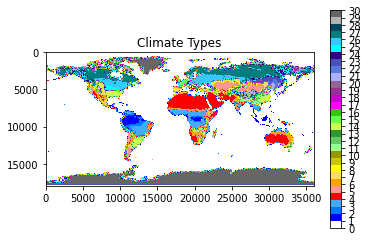

In [8]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Path to the TIFF file
tif_path = "./1991_2020/koppen_geiger_0p01.tif"

# Open the TIFF file
with rasterio.open(tif_path) as src:
    # Read the climate types from the TIFF file
    climate_types = src.read(1)

# Colors mapping for each climate type
colors = {
    0: [255, 255, 255],
    1: [0, 0, 255], 2: [0, 120, 255], 3: [70, 170, 250], 4: [255, 0, 0],
    5: [255, 150, 150], 6: [245, 165, 0], 7: [255, 220, 100], 8: [255, 255, 0],
    9: [200, 200, 0], 10: [150, 150, 0], 11: [150, 255, 150], 12: [100, 200, 100],
    13: [50, 150, 50], 14: [200, 255, 80], 15: [100, 255, 80], 16: [50, 200, 0],
    17: [255, 0, 255], 18: [200, 0, 200], 19: [150, 50, 150], 20: [150, 100, 150],
    21: [170, 175, 255], 22: [90, 120, 220], 23: [75, 80, 180], 24: [50, 0, 135],
    25: [0, 255, 255], 26: [55, 200, 255], 27: [0, 125, 125], 28: [0, 70, 95],
    29: [178, 178, 178], 30: [102, 102, 102]
}

# Create a custom colormap
cmap = ListedColormap([np.array(color) / 255.0 for color in colors.values()])

# Display the image with the custom colormap
plt.imshow(climate_types, cmap=cmap)
plt.colorbar(ticks=list(colors.keys()), format='%.0f')
plt.title('Climate Types')
plt.show()

In [ ]:
import geopandas as gpd
from rasterio.features import shapes
from shapely.geometry import shape
'''
# Path to the TIFF file
tif_path = "/content/drive/MyDrive/23GIS_project/koppen_geiger_tif/1991_2020/koppen_geiger_0p01.tif"

# Open the TIFF file
with rasterio.open(tif_path) as src:
    # Read the climate types from the TIFF file
    climate_types = src.read(1)

# Colors mapping for each climate type
colors = {
    0: [255, 255, 255],
    1: [0, 0, 255], 2: [0, 120, 255], 3: [70, 170, 250], 4: [255, 0, 0],
    5: [255, 150, 150], 6: [245, 165, 0], 7: [255, 220, 100], 8: [255, 255, 0],
    9: [200, 200, 0], 10: [150, 150, 0], 11: [150, 255, 150], 12: [100, 200, 100],
    13: [50, 150, 50], 14: [200, 255, 80], 15: [100, 255, 80], 16: [50, 200, 0],
    17: [255, 0, 255], 18: [200, 0, 200], 19: [150, 50, 150], 20: [150, 100, 150],
    21: [170, 175, 255], 22: [90, 120, 220], 23: [75, 80, 180], 24: [50, 0, 135],
    25: [0, 255, 255], 26: [55, 200, 255], 27: [0, 125, 125], 28: [0, 70, 95],
    29: [178, 178, 178], 30: [102, 102, 102]
}

# Extract polygons from the raster data
results = list(shapes(climate_types, transform=src.transform))

# Create GeoDataFrames for each climate type
gdfs = {}
for value, color in colors.items():
    mask = (climate_types == value).astype('uint8')
    results_masked = list(shapes(mask, transform=src.transform))

    if results_masked:
        shapes_list, values_list = zip(*results_masked)
        geometries = [shape(geom) for geom in shapes_list]
        gdf = gpd.GeoDataFrame(geometry=geometries, crs='EPSG:4326')
        gdf['climate_type'] = value
        gdfs[value] = gdf

# Access GeoDataFrames by climate type
for value, gdf in gdfs.items():
    print(f"Climate Type {value} GeoDataFrame:")
    print(gdf.head())


combined_gdf = pd.concat(gdfs.values(), ignore_index=True)
combined_gdf.head()
'''

In [9]:
import rioxarray
from geocube.vector import vectorize

df_climate = rioxarray.open_rasterio("./1991_2020/koppen_geiger_0p01.tif").squeeze()
df_climate.name = "clm_index"
gdf_climate = vectorize(df_climate)

In [10]:
clm_indexes = list(gdf_climate['clm_index'].unique())
clm_indexes.sort()
clm_indexes

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0]

In [11]:
gdf_climate.head()

,clm_index,geometry
0,29.0,"POLYGON ((-31.22000 83.62000, -31.22000 83.610..."
1,29.0,"POLYGON ((-35.54000 83.59000, -35.54000 83.580..."
2,29.0,"POLYGON ((-35.35000 83.59000, -35.35000 83.580..."
3,30.0,"POLYGON ((-35.09000 83.59000, -35.09000 83.580..."
4,29.0,"POLYGON ((-32.71000 83.59000, -32.71000 83.580..."


In [12]:
points_within = geopandas.sjoin(gdf, gdf_climate, predicate='within', how='left')

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():


In [13]:
points_within

,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,Population density in a 10km radius -Mean,Population density in a 20km radius -Mean,Population density in a 100km radius -Mean,...,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 10 km radius - Mean.1,Pasture land in a 10 km radius - Mean.2,geometry,index_right,clm_index
0,101,64665,Santa Catarina,Brazil,Latin America and Caribbean,-28.732400,-49.245520,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.24552 -28.73240),379644.0,14.0
1,11 RAU-Novaya,68289,Luhans'ka Oblast',Ukraine,Europe,48.519540,38.658270,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (38.65827 48.51954),185036.0,25.0
2,1165L,63154,Tete,Mozambique,Africa,-16.230000,34.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (34.00000 -16.23000),370056.0,6.0
3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.482790,-58.833530,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.83353 -11.48279),363994.0,3.0
4,12 Mile Creek,66178,Queensland,Australia,Asia-Pacific,-23.163000,149.083000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (149.08300 -23.16300),375831.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34264,Zymo,38983,British Columbia,Canada,United States and Canada,54.831119,-128.058003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-128.05800 54.83112),133186.0,27.0
34265,Zyrianovsk Complex,28934,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.877040,84.262650,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (84.26265 49.87704),176024.0,26.0
34266,Zyrox Texada,59481,British Columbia,Canada,United States and Canada,49.775650,-124.600290,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-124.60029 49.77565),149339.0,9.0
34267,Zyryanovskoe,61205,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.740000,84.296000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (84.29600 49.74000),176024.0,26.0


In [14]:
points_within.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 34269 entries, 0 to 34268
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Property Name                               34269 non-null  object  
 1   Property ID                                 34269 non-null  int64   
 2   State/Province                              33881 non-null  object  
 3   Country Name                                34269 non-null  object  
 4   SNL Global Region                           34269 non-null  object  
 5   Latitude                                    34255 non-null  float64 
 6   Longitude                                   34255 non-null  float64 
 7   Population density in a 10km radius -Mean   0 non-null      float64 
 8   Population density in a 20km radius -Mean   0 non-null      float64 
 9   Population density in a 100km radius -Mean  0 non-null      floa

In [15]:
clms = list(points_within['clm_index'].unique())
len(clms)

30

In [16]:
gdf[gdf['Latitude'].isnull()].info()

#gdf[gdf['State/Province '].isnull()]
#lat&long있어서 고려안해도 될듯

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14 entries, 1292 to 31573
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Property Name                               14 non-null     object  
 1   Property ID                                 14 non-null     int64   
 2   State/Province                              9 non-null      object  
 3   Country Name                                14 non-null     object  
 4   SNL Global Region                           14 non-null     object  
 5   Latitude                                    0 non-null      float64 
 6   Longitude                                   0 non-null      float64 
 7   Population density in a 10km radius -Mean   0 non-null      float64 
 8   Population density in a 20km radius -Mean   0 non-null      float64 
 9   Population density in a 100km radius -Mean  0 non-null      floa

In [ ]:
#points_within[points_within['clm_index'].isnull()]

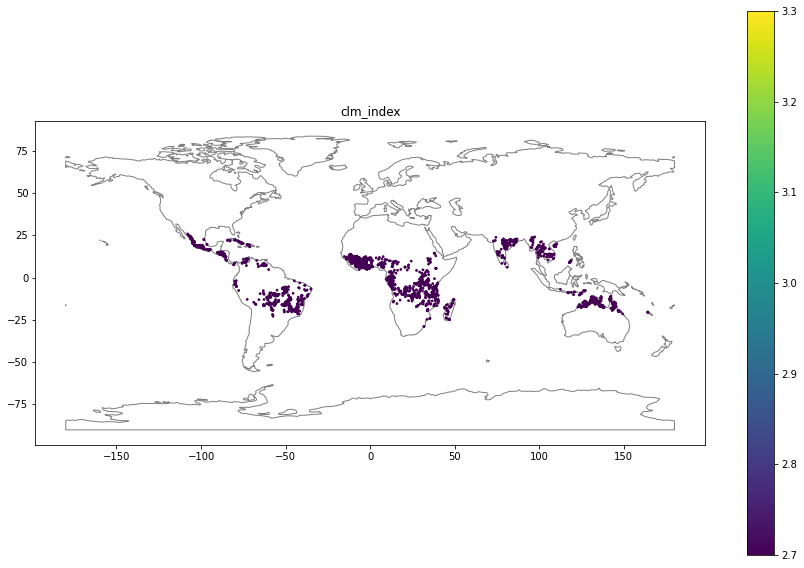

In [17]:
#예시: clm_index가 3인 point들의 위치

points_within3 = points_within[points_within['clm_index']==3]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(15,10))

world.plot(ax=ax, color='white', edgecolor='gray')

# Display the image with the custom colormap
#ax = gdf.plot(column='geometry', s=1)
g = points_within3.plot(column='clm_index', markersize=3, legend=True, ax=ax)
g.set_title('clm_index')

plt.show()

Text(0.5, 1.0, 'clm_index')

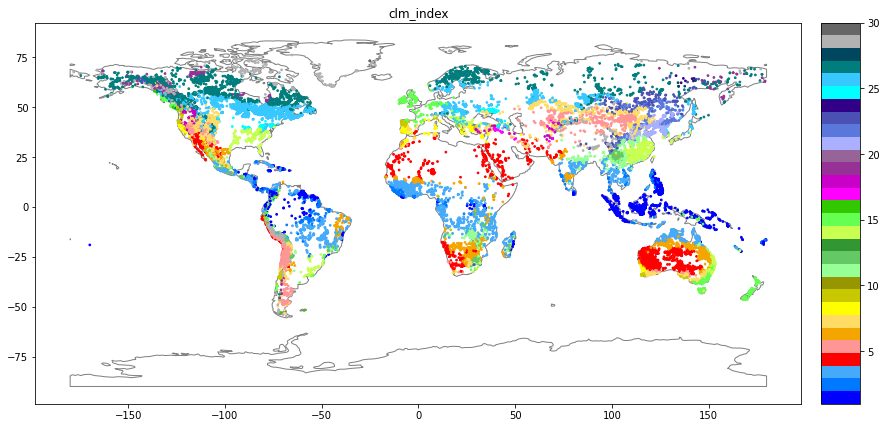

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(15,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)

legend_colors = {
    1: [0, 0, 255], 2: [0, 120, 255], 3: [70, 170, 250], 4: [255, 0, 0],
    5: [255, 150, 150], 6: [245, 165, 0], 7: [255, 220, 100], 8: [255, 255, 0],
    9: [200, 200, 0], 10: [150, 150, 0], 11: [150, 255, 150], 12: [100, 200, 100],
    13: [50, 150, 50], 14: [200, 255, 80], 15: [100, 255, 80], 16: [50, 200, 0],
    17: [255, 0, 255], 18: [200, 0, 200], 19: [150, 50, 150], 20: [150, 100, 150],
    21: [170, 175, 255], 22: [90, 120, 220], 23: [75, 80, 180], 24: [50, 0, 135],
    25: [0, 255, 255], 26: [55, 200, 255], 27: [0, 125, 125], 28: [0, 70, 95],
    29: [178, 178, 178], 30: [102, 102, 102]
}
cmap = ListedColormap([np.array(color) / 255.0 for color in legend_colors.values()])

world.plot(ax=ax, color='white', edgecolor='gray')

# Display the image with the custom colormap
#ax = gdf.plot(column='geometry', s=1)
g = points_within.plot(column='clm_index', markersize=3, legend=True, ax=ax, cax=cax, cmap=cmap)
g.set_title('clm_index')


points_within.to_csv('./climate_index.csv', index=False)

In [21]:
points_within

,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,Population density in a 10km radius -Mean,Population density in a 20km radius -Mean,Population density in a 100km radius -Mean,...,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 10 km radius - Mean.1,Pasture land in a 10 km radius - Mean.2,geometry,index_right,clm_index
0,101,64665,Santa Catarina,Brazil,Latin America and Caribbean,-28.732400,-49.245520,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.24552 -28.73240),379644.0,14.0
1,11 RAU-Novaya,68289,Luhans'ka Oblast',Ukraine,Europe,48.519540,38.658270,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (38.65827 48.51954),185036.0,25.0
2,1165L,63154,Tete,Mozambique,Africa,-16.230000,34.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (34.00000 -16.23000),370056.0,6.0
3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.482790,-58.833530,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.83353 -11.48279),363994.0,3.0
4,12 Mile Creek,66178,Queensland,Australia,Asia-Pacific,-23.163000,149.083000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (149.08300 -23.16300),375831.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34264,Zymo,38983,British Columbia,Canada,United States and Canada,54.831119,-128.058003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-128.05800 54.83112),133186.0,27.0
34265,Zyrianovsk Complex,28934,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.877040,84.262650,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (84.26265 49.87704),176024.0,26.0
34266,Zyrox Texada,59481,British Columbia,Canada,United States and Canada,49.775650,-124.600290,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-124.60029 49.77565),149339.0,9.0
34267,Zyryanovskoe,61205,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.740000,84.296000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (84.29600 49.74000),176024.0,26.0


In [19]:
legend = pd.read_csv('legend.csv')
legend

,index,category,abb,name,rgb
0,1,1,Af,"Tropical, rainforest","[0, 0, 255]"
1,2,1,Am,"Tropical, monsoon","[0, 120, 255]"
2,3,1,Aw,"Tropical, savannah","[70, 170, 250]"
3,4,2,BWh,"Arid, desert, hot","[255, 0, 0]"
4,5,2,BWk,"Arid, desert, cold","[255, 150, 150]"
5,6,2,BSh,"Arid, steppe, hot","[245, 165, 0]"
6,7,2,BSk,"Arid, steppe, cold","[255, 220, 100]"
7,8,3,Csa,"Temperate, dry summer, hot summer","[255, 255, 0]"
8,9,3,Csb,"Temperate, dry summer, warm summer","[200, 200, 0]"
9,10,3,Csc,"Temperate, dry summer, cold summer","[150, 150, 0]"


In [22]:
clm_dict = {'Tropical' : [1,2,3], 'Arid' : [4,5,6,7], 'Polar' : [29,30]}


In [24]:
clm = points_within['clm_index']

ARID = []
TROPICAL = []
POLAR = []

for c in clm:
    try: 
        int(c)
        if int(c) in clm_dict['Tropical']:
            TROPICAL.append(1)
            ARID.append(0)
            POLAR.append(0)
        elif int(c) in clm_dict['Arid']:
            TROPICAL.append(0)
            ARID.append(1)
            POLAR.append(0)
        elif int(c) in clm_dict['Polar']:
            TROPICAL.append(0)
            ARID.append(0)
            POLAR.append(1)
        else:
            TROPICAL.append(0)
            ARID.append(0)
            POLAR.append(0)
    except:
            TROPICAL.append(np.NaN)
            ARID.append(np.NaN)
            POLAR.append(np.NaN)

points_within['Arid climate'] = ARID
points_within['Tropical rainforest climate'] = TROPICAL
points_within['Polar climate'] = POLAR

In [25]:
points_within

,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,Population density in a 10km radius -Mean,Population density in a 20km radius -Mean,Population density in a 100km radius -Mean,...,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 10 km radius - Mean.1,Pasture land in a 10 km radius - Mean.2,geometry,index_right,clm_index
0,101,64665,Santa Catarina,Brazil,Latin America and Caribbean,-28.732400,-49.245520,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.24552 -28.73240),379644.0,14.0
1,11 RAU-Novaya,68289,Luhans'ka Oblast',Ukraine,Europe,48.519540,38.658270,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (38.65827 48.51954),185036.0,25.0
2,1165L,63154,Tete,Mozambique,Africa,-16.230000,34.000000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (34.00000 -16.23000),370056.0,6.0
3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.482790,-58.833530,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.83353 -11.48279),363994.0,3.0
4,12 Mile Creek,66178,Queensland,Australia,Asia-Pacific,-23.163000,149.083000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (149.08300 -23.16300),375831.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34264,Zymo,38983,British Columbia,Canada,United States and Canada,54.831119,-128.058003,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-128.05800 54.83112),133186.0,27.0
34265,Zyrianovsk Complex,28934,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.877040,84.262650,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (84.26265 49.87704),176024.0,26.0
34266,Zyrox Texada,59481,British Columbia,Canada,United States and Canada,49.775650,-124.600290,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-124.60029 49.77565),149339.0,9.0
34267,Zyryanovskoe,61205,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.740000,84.296000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (84.29600 49.74000),176024.0,26.0


In [26]:
points_within['Current climate category'] = clm
points_within

,Property Name,Property ID,State/Province,Country Name,SNL Global Region,Latitude,Longitude,Population density in a 10km radius -Mean,Population density in a 20km radius -Mean,Population density in a 100km radius -Mean,...,Polar climate,Croplands in 10km radius - Mean,Croplands in 20km radius - Mean,Croplands in 100km radius - Mean,Pasture land in a 10 km radius - Mean,Pasture land in a 10 km radius - Mean.1,Pasture land in a 10 km radius - Mean.2,geometry,index_right,clm_index
0,101,64665,Santa Catarina,Brazil,Latin America and Caribbean,-28.732400,-49.245520,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.24552 -28.73240),379644.0,14.0
1,11 RAU-Novaya,68289,Luhans'ka Oblast',Ukraine,Europe,48.519540,38.658270,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (38.65827 48.51954),185036.0,25.0
2,1165L,63154,Tete,Mozambique,Africa,-16.230000,34.000000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (34.00000 -16.23000),370056.0,6.0
3,119 Property,32960,Mato Grosso,Brazil,Latin America and Caribbean,-11.482790,-58.833530,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-58.83353 -11.48279),363994.0,3.0
4,12 Mile Creek,66178,Queensland,Australia,Asia-Pacific,-23.163000,149.083000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (149.08300 -23.16300),375831.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34264,Zymo,38983,British Columbia,Canada,United States and Canada,54.831119,-128.058003,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-128.05800 54.83112),133186.0,27.0
34265,Zyrianovsk Complex,28934,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.877040,84.262650,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (84.26265 49.87704),176024.0,26.0
34266,Zyrox Texada,59481,British Columbia,Canada,United States and Canada,49.775650,-124.600290,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-124.60029 49.77565),149339.0,9.0
34267,Zyryanovskoe,61205,Shyghys Qazaqstan oblysy,Kazakhstan,Europe,49.740000,84.296000,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (84.29600 49.74000),176024.0,26.0


In [27]:
points_within.to_csv('climate_index.csv', index=False)